<a href="https://colab.research.google.com/github/JasmineVan/EnsembleLearningAndClassification/blob/main/51800128_51800897_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import thư viện

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import datetime
from sklearn.metrics import classification_report
import seaborn as sns

# Đọc file

Dữ liệu: [Occupancy Detection Data Set](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)

Các thuộc tính:
*   datetime year-month-day hour:minute:second
*   Temperature (Celsius)
*   Relative Humidity (%)
*   Light (Lux)
*   CO2 (ppm)
*   Humidity Ratio
*   Occupancy, 0 hoặc 1, 0 cho tình trạng không có người ở, 1 cho tình trạng có người ở

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/Final/datatraining.txt")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [ ]:
print(f'data shape = {df.shape}')
df.head(5)

data shape = (8143, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
df['date'] = df['date'].str[5:]

In [ ]:
df.set_index(['date'], inplace = True)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


# Vẽ biểu đồ khảo sát dữ liệu

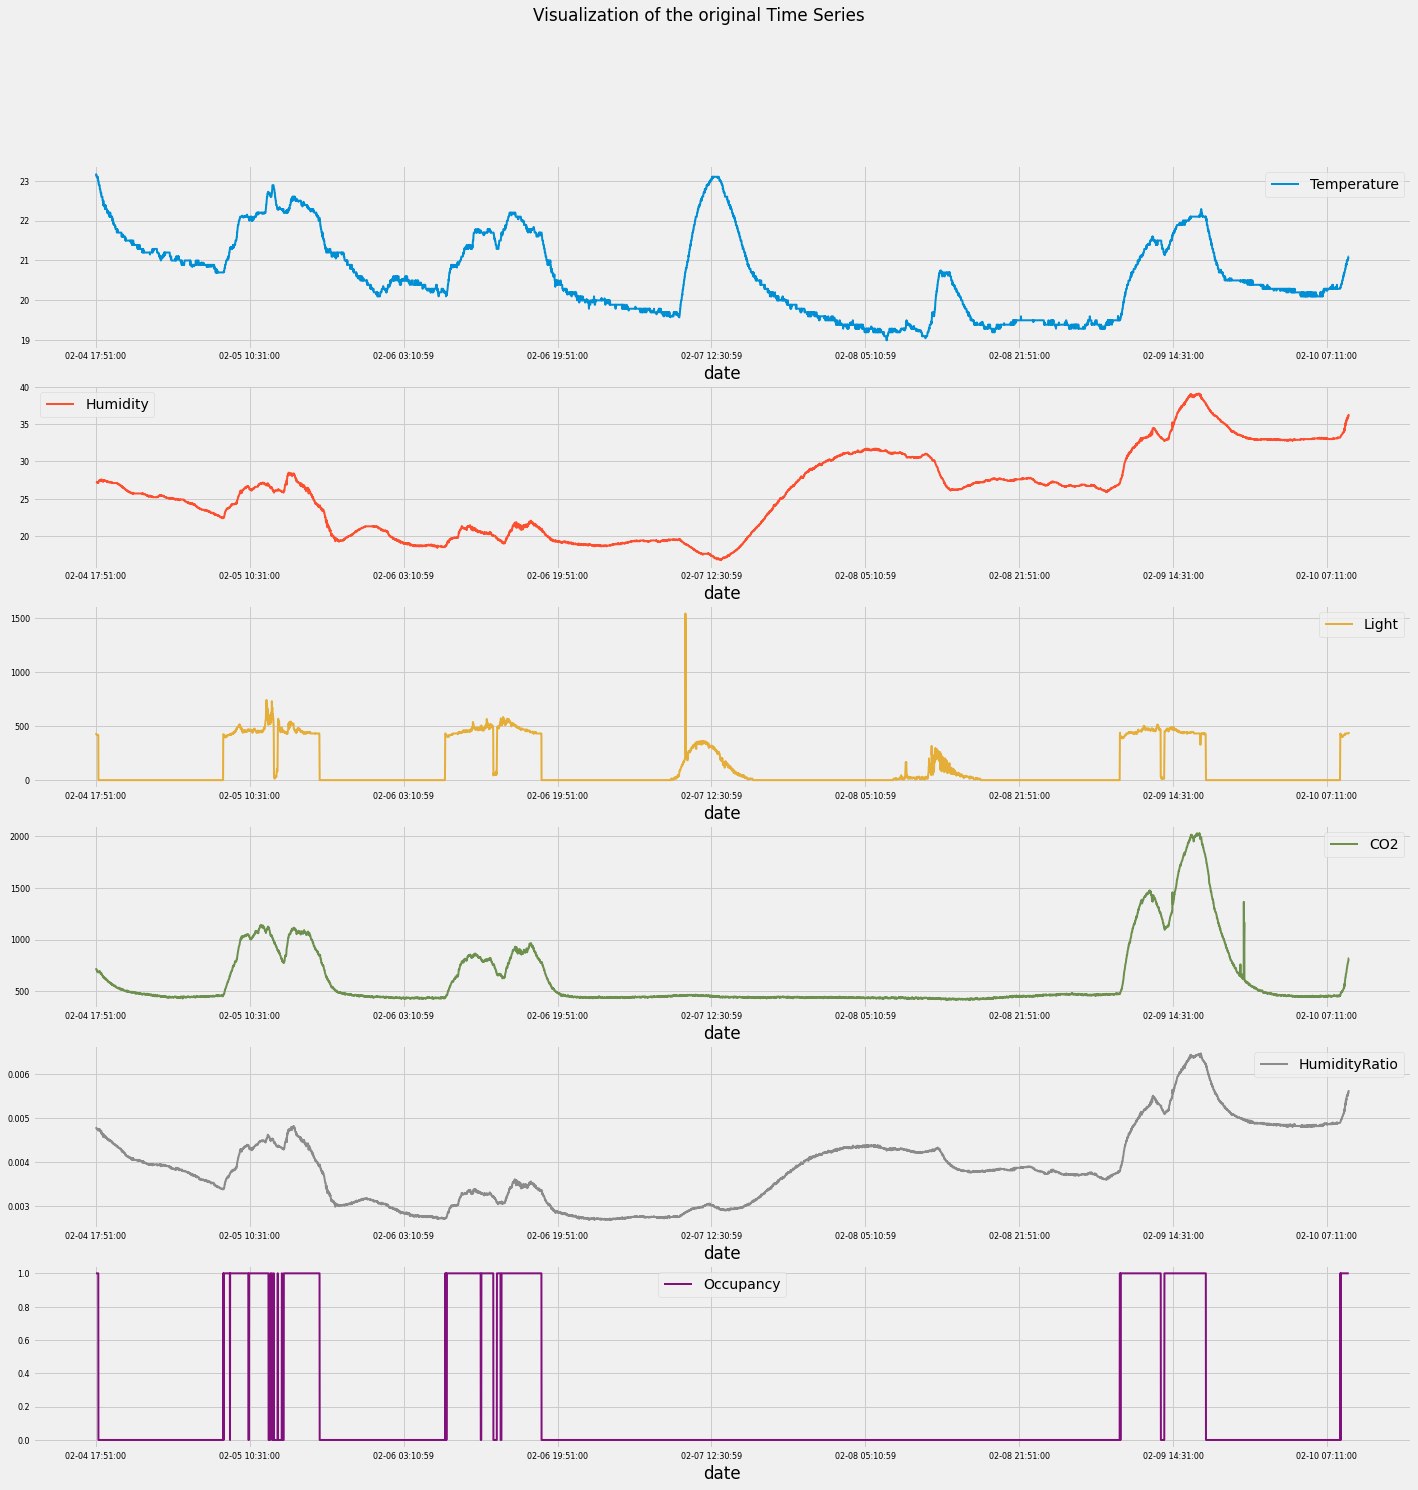

In [ ]:
plt.style.use('fivethirtyeight')
df.plot(subplots=True,
        layout=(6, 1),
        figsize=(22,22),
        fontsize=8, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

In [ ]:
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


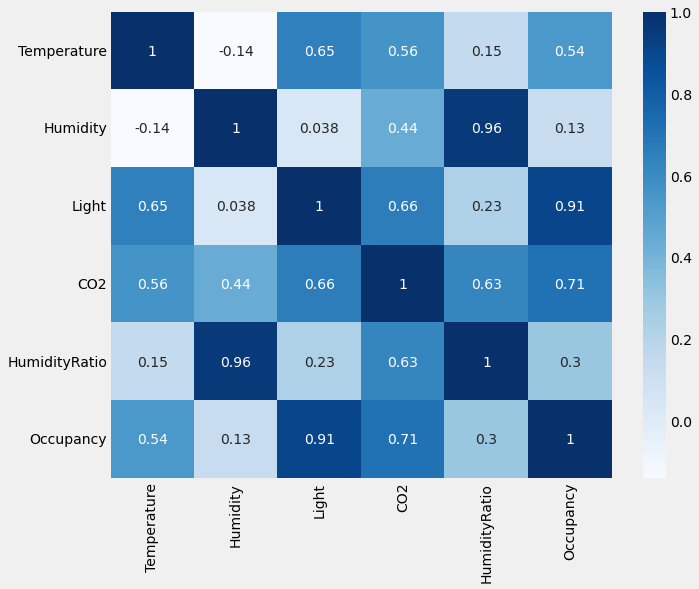

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.corr(), annot = True, cmap = 'Blues')
plt.show()

# Tiền xử lý dữ liệu

In [ ]:
X = df.iloc[:,:5]
y = df.Occupancy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train:')
print(X_train.shape)
print(y_train.shape)
print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(5700, 5)
(5700,)
Test:
(2443, 5)
(2443,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train.values),
                                     index=X_train.index,
                                     columns=X_train.columns)

scaled_X_test = pd.DataFrame(scaler.transform(X_test.values),
                                    index=X_test.index,
                                    columns=X_test.columns)

scaled_X_train.shape, scaled_X_test.shape

((5700, 5), (2443, 5))

# Classification

In [ ]:
from sklearn.naive_bayes import CategoricalNB
model_CNB = CategoricalNB()
model_CNB.fit(scaled_X_train,y_train)

y_pred = model_CNB.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1926
           1       1.00      0.00      0.00       517

    accuracy                           0.79      2443
   macro avg       0.89      0.50      0.44      2443
weighted avg       0.83      0.79      0.70      2443



In [ ]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(scaled_X_train,y_train)

y_pred = model_GNB.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1926
           1       0.91      0.99      0.95       517

    accuracy                           0.98      2443
   macro avg       0.96      0.98      0.97      2443
weighted avg       0.98      0.98      0.98      2443



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train, y_train)

y_pred = knn.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1926
           1       0.99      0.99      0.99       517

    accuracy                           1.00      2443
   macro avg       1.00      0.99      1.00      2443
weighted avg       1.00      1.00      1.00      2443



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(scaled_X_train, y_train)

y_pred = clf.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1926
           1       0.95      0.99      0.97       517

    accuracy                           0.99      2443
   macro avg       0.97      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(scaled_X_train, y_train)

y_pred = decision_tree.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1926
           1       0.96      0.98      0.97       517

    accuracy                           0.99      2443
   macro avg       0.98      0.98      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(scaled_X_train, y_train)

y_pred = svm.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1926
           1       0.95      1.00      0.97       517

    accuracy                           0.99      2443
   macro avg       0.97      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



# Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()

rfclf.fit(scaled_X_train, y_train)

y_pred = rfclf.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1926
           1       0.99      0.99      0.99       517

    accuracy                           1.00      2443
   macro avg       0.99      1.00      1.00      2443
weighted avg       1.00      1.00      1.00      2443



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier()

adaclf.fit(scaled_X_train, y_train)
y_pred = adaclf.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1926
           1       0.97      0.99      0.98       517

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Xây dựng mô hình Recurrent Neural Network

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
print(y_train[:2])

y_test = to_categorical(y_test)
print(y_test[:2])

[[1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]]


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])


In [ ]:
History = model.fit(scaled_X_train,y_train,epochs=100, batch_size=24, verbose=0, validation_data=(scaled_X_test, y_test))

In [ ]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 16)                96        
                                                                 
 dense_51 (Dense)            (None, 32)                544       
                                                                 
 dense_52 (Dense)            (None, 64)                2112      
                                                                 
 dense_53 (Dense)            (None, 2)                 130       
                                                                 
Total params: 2,882
Trainable params: 2,882
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_loss, train_acc = model.evaluate(scaled_X_train, y_train,
                                       batch_size=24, verbose=0)
test_loss, test_acc = model.evaluate(scaled_X_test, y_test,
                                     batch_size=24, verbose=0)

-----------------------------------------------------------------
train accuracy = 98.8947%
test accuracy = 98.8129%
test error = 29 out of 2443 examples


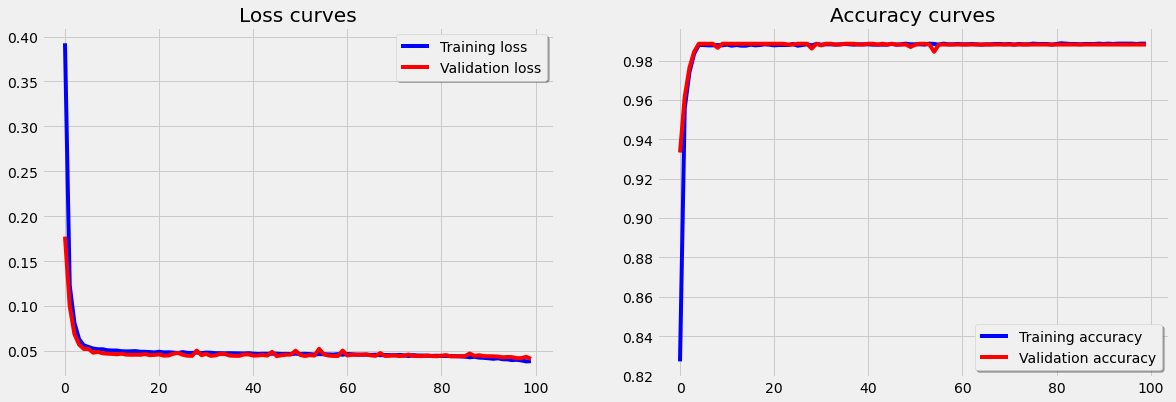

In [ ]:
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * 2443)} out of {2443} examples')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(2,activation='sigmoid'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
History = model1.fit(scaled_X_train,y_train,epochs=100, batch_size=10, verbose=0, validation_data=(scaled_X_test, y_test))

In [ ]:
print(model1.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 64)                384       
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_49 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2,530
Trainable params: 2,530
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_loss, train_acc = model1.evaluate(scaled_X_train, y_train,
                                       batch_size=10, verbose=0)
test_loss, test_acc = model1.evaluate(scaled_X_test, y_test,
                                     batch_size=10, verbose=0)

-----------------------------------------------------------------
train accuracy = 99.0%
test accuracy = 98.8539%
test error = 28 out of 2443 examples


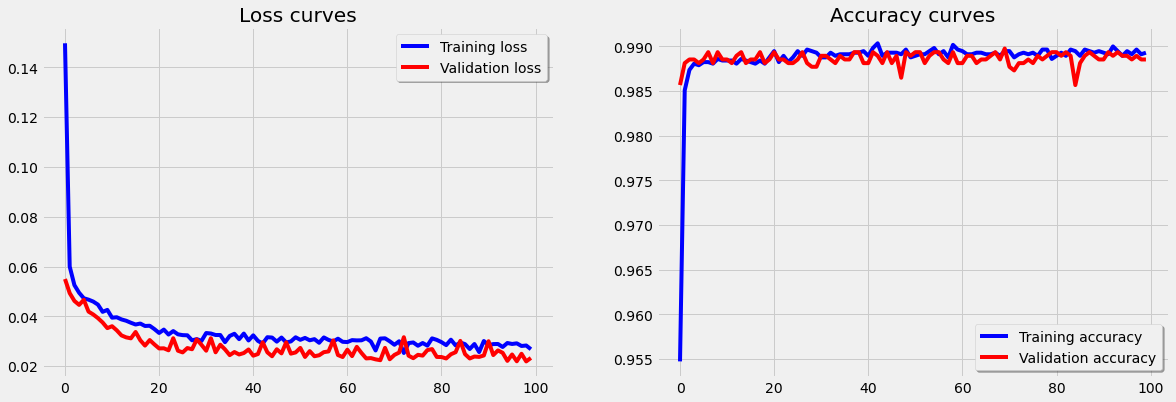

In [ ]:
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * 2443)} out of {2443} examples')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()